# DLTHON

## DKTC (Dataset of Korean Threatening Conversations)

- 텍스트 다중분류 프로젝트

## EDA


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import numpy as np
from tqdm import tqdm, trange

tqdm.pandas()

In [2]:
import os
import pandas as pd

train_data_path ="./data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [3]:
train_data.shape

(3950, 3)

In [4]:
train_data.nunique()

idx             3950
class              4
conversation    3846
dtype: int64

- 전처리를 하니까 같아지는 데이터셋이 존재하는 것으로 보인다

## 데이터 전처리

In [5]:
# !pip install soynlp

In [6]:
import re
# import emoji
from soynlp.normalizer import repeat_normalize

In [7]:
def clean(x):
    # emojis = ''.join(emoji.UNICODE_EMOJI.keys())
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [8]:
train_data['cleaned'] = train_data.conversation.apply(lambda x: clean(x))

In [9]:
train_data['cleaned']

0       지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼...
1       길동경찰서입니다. 9시 40분 마트에 폭발물을 설치할거다. 네? 똑바로 들어 한번만...
2       너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어. 그만해. 니들 놀리는거 재미없...
3       어이 거기 예?? 너 말이야 너. 이리 오라고 무슨 일. 너 옷 좋아보인다? 얘 돈...
4       저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
                              ...                        
3945    준하야 넌 대가리가 왜이렇게 크냐? 내 머리가 뭐. 밥먹으면 대가리만 크냐 너는? ...
3946    내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내 예.? ...
3947    나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지. 왜 그래. 들리겠어....
3948    누구맘대로 여기서 장사하래? 이게 무슨일입니까? 남의 구역에서 장사하려면 자릿세를 ...
3949    희정씨 네? 주말에 시간이 넘쳐나나봐 갑자기 왜그러세요? 손이 빤짝빤짝 네일했니? ...
Name: cleaned, Length: 3950, dtype: object

### 한국어 문장 분리기

In [10]:
# !pip install kss

In [11]:
samples = train_data.sample(5)

In [12]:
samples

,idx,class,conversation,cleaned
2780,2780,갈취 대화,친구야. 잠시만 이리와보자\n네.? 저요?\n그래. 너말고 누가 있니.\n네. 왜 ...,친구야. 잠시만 이리와보자 네.? 저요? 그래. 너말고 누가 있니. 네. 왜 그러세...
562,562,직장 내 괴롭힘 대화,일 더 있나요? 이제 퇴근시간도 한참지났는데요\n가긴 어딜가 더 해야지\n이런 적 ...,일 더 있나요? 이제 퇴근시간도 한참지났는데요 가긴 어딜가 더 해야지 이런 적 하루...
439,439,협박 대화,다 죽여버리기전에 여기에 돈 담아!\n꺄악.!! 도둑.도둑이야.!\n당.당신 누구야...,다 죽여버리기전에 여기에 돈 담아! 꺄악.!! 도둑.도둑이야.! 당.당신 누구야.!...
2574,2574,갈취 대화,저기 사물함 앞에 키 작은애!\n나?\n그래 너! 너 아니면 누구겠냐? 너 오늘도 ...,저기 사물함 앞에 키 작은애! 나? 그래 너! 너 아니면 누구겠냐? 너 오늘도 지갑...
3896,3896,기타 괴롭힘 대화,후라이팬 환불좀 해주세요\n네? 고객님 구매는 언제 하셨을까여\n구매가 언제한지가 ...,후라이팬 환불좀 해주세요 네? 고객님 구매는 언제 하셨을까여 구매가 언제한지가 뭐가...


In [13]:
samples.cleaned.iloc[0]

'친구야. 잠시만 이리와보자 네.? 저요? 그래. 너말고 누가 있니. 네. 왜 그러세요. 너 그 신발 비싼건데.나도 신어봐도 될까? 신발이요.? 이거 엄마가 사준거라서. 그걸 내가 몰라서 물어? 달라는 게 아니잖아 아.넵. 음. 신발 이쁘다. 다음주까지만 빌릴게 네.'

### 데이터 클래스별 길이 분포 확인

In [14]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline

fm.get_fontconfig_fonts()
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

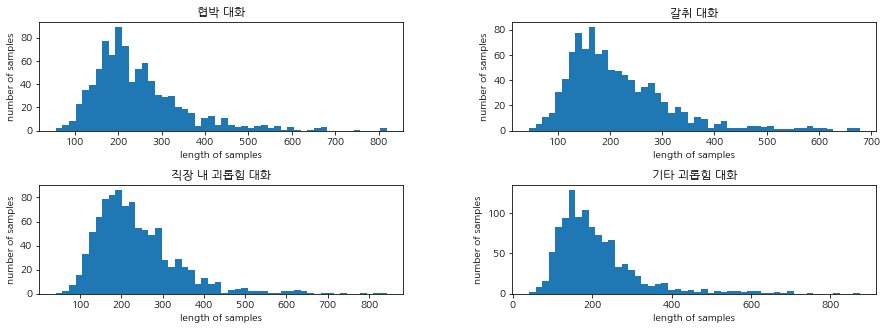

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='협박 대화']], bins=50)
axes[0][0].set_xlabel('length of samples')
axes[0][0].set_ylabel('number of samples')
axes[0][0].set_title('협박 대화')

axes[0][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='갈취 대화']], bins=50)
axes[0][1].set_xlabel('length of samples')
axes[0][1].set_ylabel('number of samples')
axes[0][1].set_title('갈취 대화')

axes[1][0].hist([len(s) for s in train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화']], bins=50)
axes[1][0].set_xlabel('length of samples')
axes[1][0].set_ylabel('number of samples')
axes[1][0].set_title('직장 내 괴롭힘 대화')

axes[1][1].hist([len(s) for s in train_data['conversation'][train_data['class']=='기타 괴롭힘 대화']
], bins=50)
axes[1][1].set_xlabel('length of samples')
axes[1][1].set_ylabel('number of samples')
axes[1][1].set_title('기타 괴롭힘 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

### 데이터 길이, 클래스 분포 확인

데이터 정보
--------------------------------------------------
x_train : (3950,)
y_train : (3950,)
label 종류: {'직장 내 괴롭힘 대화', '갈취 대화', '기타 괴롭힘 대화', '협박 대화'}
--------------------------------------------------
클래스의 수 : 4
--------------------------------------------------
훈련용 뉴스의 최대 길이 :874
훈련용 뉴스의 평균 길이 :226.57088607594937


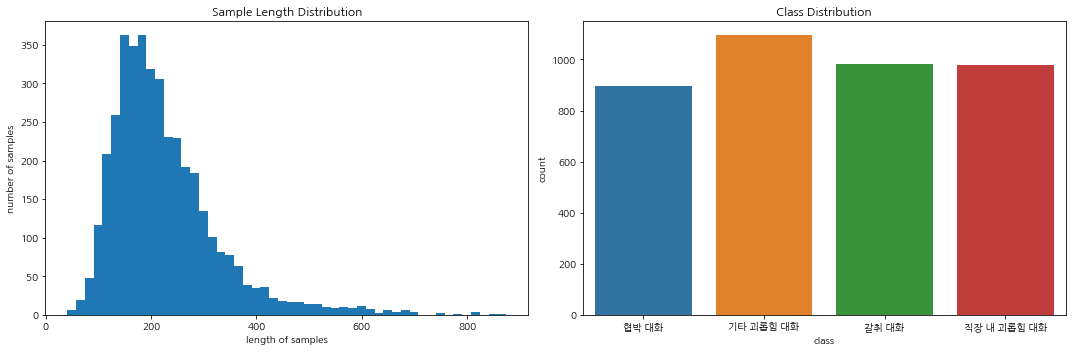

In [16]:
x_train = train_data['conversation']
y_train = train_data['class']

print('데이터 정보')
print('-'*50)
print('x_train :',x_train.shape)
print('y_train :',y_train.shape)
print('label 종류:', set(y_train))
print('-'*50)
num_classes = 4
print('클래스의 수 : {}'.format(num_classes))
print('-'*50)
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot the histogram of sample lengths
axes[0].hist([len(s) for s in x_train], bins=50)
axes[0].set_xlabel('length of samples')
axes[0].set_ylabel('number of samples')
axes[0].set_title('Sample Length Distribution')

# Plot the count of each class
sns.countplot(x=y_train, ax=axes[1])
axes[1].set_title('Class Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### 클래스별 핵심 키워드 시각화

In [17]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

In [18]:
import numpy as np

from tqdm import tqdm, trange

tqdm.pandas()

In [19]:
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer

# 불용어 정의
stopwords = ['의','가','이','아','은','들','는','좀','잘','걍','과','도','를','을','으로',
             '야','너','내','아니','자','에','와','한','하다','하']
okt = Okt()

In [20]:
sentence = train_data['cleaned'].iloc[0]

In [21]:
X = []
for sentence in tqdm(train_data['cleaned']):
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X.append(temp_X)

100%|██████████| 3950/3950 [00:49<00:00, 80.47it/s] 


In [22]:
morphs = [x for xx in X for x in xx]

In [23]:
cnt = Counter(morphs)

In [24]:
cnt_dict = cnt.most_common()

In [25]:
text=' '.join(morphs)

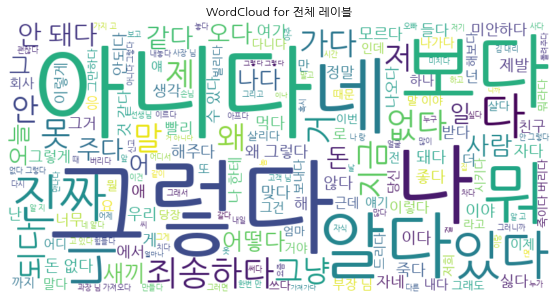

In [26]:
wc = WordCloud(font_path=font_location, width=800, height=400, background_color='white')
wc.generate(text)
        
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.title(f"WordCloud for 전체 레이블")
plt.axis('off')
plt.show()

In [27]:
wc.to_file('wc.png')

## Class 별 워드 클라우드

In [75]:
# 한국어 불용어 리스트
stopwords = set([
    '나','너','네','니','내','말','좀','제','게','거','지금','가',
    '을','는','다','에','야','아'
    '이', '그', '저', '것', '수', '들', '등', '때', '문제', '뿐', '안', '이랑', '랑', 
    '도', '곳', '걸', '에서', '하지만', '그렇지만', '그러나', '그리고', '따라서', 
    '그러므로', '그러나', '그런데', '때문에', '왜냐하면', '무엇', '어디', '어떤', 
    '어느', '어떻게', '누가', '누구', '어떤', '한', '하다', '있다', '되다', '이다', 
    '로', '로서', '로써', '과', '와', '이다', '입니다', '한다', '할', '위해', 
    '또한', '및', '이외', '더불어', '그리고', '따라', '따라서', '뿐만아니라', '그럼', 
    '하지만', '있어서', '그래서', '그렇다면', '이에', '때문에', '무엇', '어디', 
    '어떻게', '왜', '어느', '하는', '하게', '해서', '이러한', '이렇게', '그러한', 
    '그렇게', '저러한', '저렇게', '하기', '한것', '한것이', '일때', '있는', '있는것', 
    '있는지', '여기', '저기', '거기', '뭐', '왜', '어디', '어느', '어떻게', '무엇을', 
    '어디서', '어디에', '무엇인가', '무엇이', '어떤', '누가', '누구', '무엇', 
    '어디', '어떤', '한', '하다', '있다', '되다', '이다', '로', '로서', '로써', 
    '과', '와', '이', '그', '저', '것', '수', '들', '등', '때', '문제', '뿐', 
    '안', '이랑', '랑', '도', '곳', '걸', '에서', '하지만', '그렇지만', '그러나', 
    '그리고', '따라서', '그러므로', '그러나', '그런데', '때문에', '왜냐하면'
])

# KoNLPy Okt 형태소 분석기 로드
okt = Okt()

def remove_stopwords(texts, stopwords, okt):
    """
    입력 리스트에서 불용어를 제거하고 형태소 분석하여 반환하는 함수

    :param texts: 리스트 형식의 텍스트 데이터
    :param stopwords: 불용어 리스트
    :param okt: KoNLPy Okt 형태소 분석기
    :return: 불용어가 제거된 텍스트 리스트
    """
    result_nouns = []
    result_tokens = []
    for text in tqdm(texts):
        nouns = okt.nouns(text)
        tokens = okt.morphs(text)
        
        filtered_nouns = [token for token in nouns if token not in stopwords]
        filtered_tokens = [token for token in tokens if token not in stopwords]
        filtered_tokens = [token for token in tokens if len(token) > 1]
        
        result_nouns.append(' '.join(filtered_nouns))
        result_tokens.append(' '.join(filtered_tokens))
        
    return result_nouns, result_tokens

In [76]:
texts = train_data['cleaned']
result_nouns, result_tokens = remove_stopwords(texts, stopwords, okt)

100%|██████████| 3950/3950 [01:42<00:00, 38.58it/s]


In [77]:
train_data['nouns'] = result_nouns
train_data['tokens'] = result_tokens

In [78]:
# Step 2: Preprocess text
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = text.lower()  # Convert to lower case
    return text

# Step 3: Generate WordCloud for each class
def generate_wordclouds(df, col):
    labels = df['class'].unique()
    for label in labels:
        class_text = " ".join(df[df['class'] == label][col].apply(preprocess_text))
        wordcloud = WordCloud(font_path=font_location, width=800, height=400, background_color='white').generate(class_text)
        wordcloud.to_file(f'{label}_{col}.png')
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"WordCloud for {label}_{col}")
        plt.axis('off')
        plt.show()

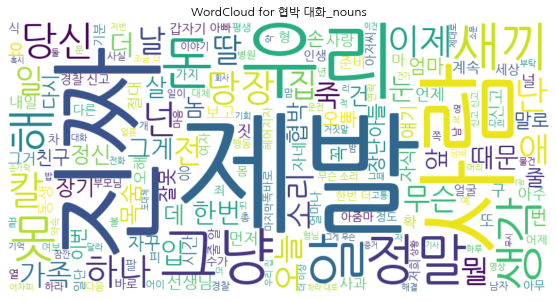

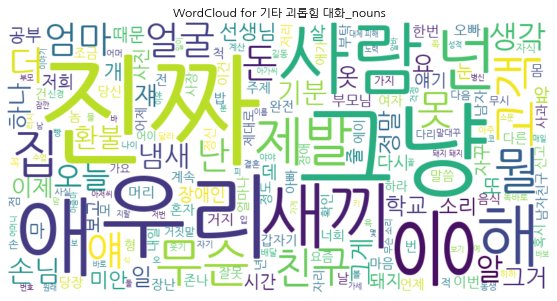

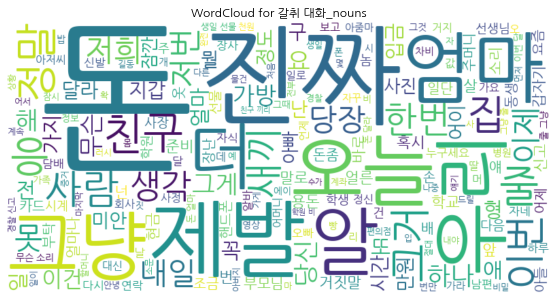

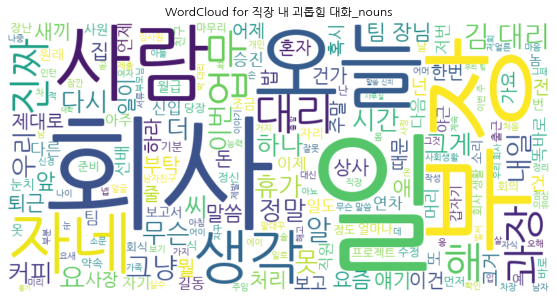

In [79]:
generate_wordclouds(train_data,'nouns')

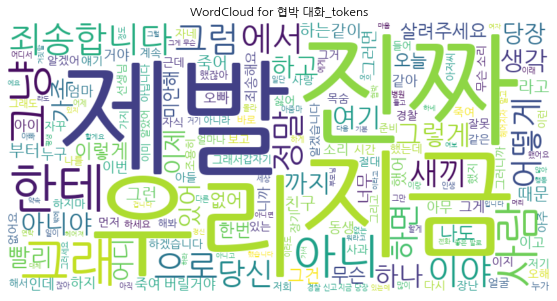

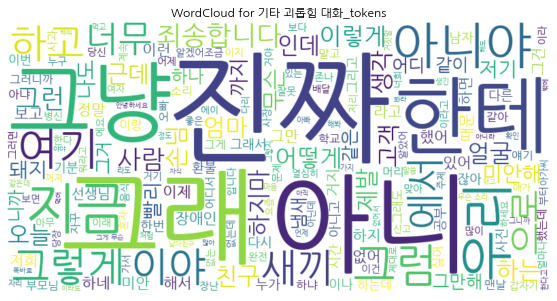

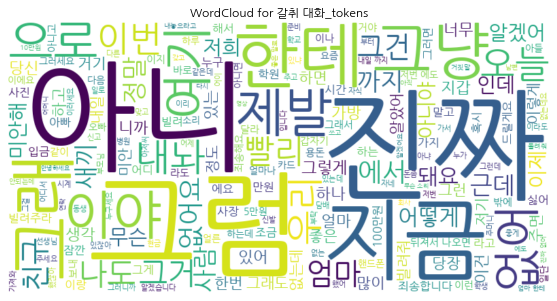

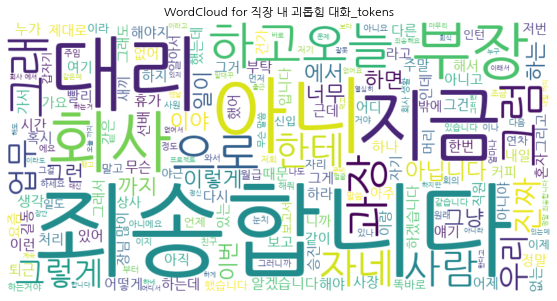

In [80]:
generate_wordclouds(train_data,'tokens')

In [81]:
label_encode = {
    "협박 대화" : 0,
    "갈취 대화" : 1,
    "직장 내 괴롭힘 대화" : 2,
    "기타 괴롭힘 대화" : 3,   
}

In [82]:
cate = train_data['class'].unique().tolist()

In [83]:
cate

['협박 대화', '기타 괴롭힘 대화', '갈취 대화', '직장 내 괴롭힘 대화']

## 빈도수 높은 단어 추출

In [84]:
data = train_data.copy()

In [85]:
data

,idx,class,conversation,cleaned,nouns,tokens
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼...,스스로 달라 애원 죽 혼자 죽지 우리 사건 휘 말리 해 진짜 정말 선택 가족 정말 ...,지금 스스로 죽여 달라 애원 하는 인가 아닙니다 죄송합니다 혼자 죽지 우리 까지 사...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동경찰서입니다. 9시 40분 마트에 폭발물을 설치할거다. 네? 똑바로 들어 한번만...,길동 경찰서 마트 폭발물 설치 똑바로 한번 더 얘기 장난 전화 마트 폭발물 장난 전...,길동 경찰서 입니다 9시 40분 마트 폭발물 설치 할거다 똑바로 들어 한번 얘기 한...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어. 그만해. 니들 놀리는거 재미없...,알 남자 지영 키 이지 재는 군대 보태 난쟁이 장가 희망 더 이상 키크 수술 엄마 ...,되게 귀여운거 보다 작은 남자 봤어 그만해 놀리는거 재미없어 지영 160 이지 그럼...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어이 거기 예?? 너 말이야 너. 이리 오라고 무슨 일. 너 옷 좋아보인다? 얘 돈...,어이 예 오라 무슨 일 옷 얘 돈 돈 넌 오늘 피시방 콜 콜 마지막 기회 정말,어이 거기 ?? 이야 이리 오라 무슨 좋아 보인다 있나 아니에요 없어요 뒤져서 나오...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,혹시 날 저희 회사 선크림 번 손등 발라 진짜 선크림 중 번 발라 번 발라 진짜 성...,저기 혹시 너무 뜨겁잖아요 저희 회사 에서 선크림 파는데 손등 발라 보실래요 진짜 ...
...,...,...,...,...,...,...
3945,3945,기타 괴롭힘 대화,준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...,준하야 넌 대가리가 왜이렇게 크냐? 내 머리가 뭐. 밥먹으면 대가리만 크냐 너는? ...,준 하야 넌 대가리 머리 밥 대가리 무슨 머리 주위 대가리 대가리 쯧쯧 넌 언제 세...,하야 대가리 이렇게 크냐 머리 먹으면 대가리 크냐 아니 무슨 머리 큰다고 그러는거야...
3946,3946,갈취 대화,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내 예.? ...,아들 김길준 데리 계좌 예 선생님 우리 말로 해결 말로 상황 장난 제발 저희 아들 ...,지금 아들 김길준 데리 있어 살리고 싶으면 계좌 1억만 보내 .? 선생님 진정하시고...
3947,3947,직장 내 괴롭힘 대화,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지. 왜 그래. 들리겠어....,씨 사람 살 해 일 눈치 본인 슬슬 깨 저번 부장 부장 진짜 분 오죽 회사 생활 년...,같은 사람 보면 신기하더라 어떻게 저렇게 그래 들리겠어 들리라고 아니 눈치 없어 본...
3948,3948,갈취 대화,누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...,누구맘대로 여기서 장사하래? 이게 무슨일입니까? 남의 구역에서 장사하려면 자릿세를 ...,장사 하래 입 남 구역 장사 자릿세 내야 관청 장사 자릿세라뇨 그거 우리 구역 우리...,누구 맘대로 여기 장사 하래 무슨 니까 구역 에서 장사 하려면 자릿세 내야 관청 신...


In [86]:
intimidation = data[data['class'] == '협박 대화']
extortion = data[data['class'] == '갈취 대화']
harassment_workplace = data[data['class'] == '직장 내 괴롭힘 대화']
harassment_others = data[data['class'] == '기타 괴롭힘 대화']

In [87]:
tok1 = [t for ts in intimidation.tokens.str.split().tolist() for t in ts]
tok2 = [t for ts in extortion.tokens.str.split().tolist() for t in ts]
tok3 = [t for ts in harassment_workplace.tokens.str.split().tolist() for t in ts]
tok4 = [t for ts in harassment_others.tokens.str.split().tolist() for t in ts]

In [88]:
intimidation = Counter(tok1).most_common()
extortion = Counter(tok2).most_common()
harassment_workplace = Counter(tok3).most_common()
harassment_others = Counter(tok4).most_common()

In [89]:
d1 = pd.DataFrame(intimidation, columns = ['협박 대화','cnt'])
d2 = pd.DataFrame(extortion, columns = ['갈취 대화','cnt'])
d3 = pd.DataFrame(harassment_workplace, columns = ['직장 내 괴롭힘 대화','cnt'])
d4 = pd.DataFrame(harassment_others, columns = ['기타 괴롭힘 대화','cnt'])

In [90]:
d = pd.concat([d1, d2, d3, d4], axis=1)

l = list(label_encode.keys())

In [91]:
l

['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화']

In [92]:
d[l].head(30)

,협박 대화,갈취 대화,직장 내 괴롭힘 대화,기타 괴롭힘 대화
0,제발,진짜,죄송합니다,진짜
1,지금,그럼,대리,아니
2,진짜,아니,회사,한테
3,우리,한테,아니,그래
4,이야,지금,지금,우리
5,사람,그래,오늘,그냥
6,그래,이야,하고,무슨
7,한테,없어,부장,이야
8,무슨,내놔,무슨,지금
9,으로,그냥,으로,그렇게


## 형태소 분석기 비교

In [93]:
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Hannanum
from konlpy.tag import Komoran

In [94]:
okt = Okt()
kkma = Kkma()
m = Mecab()
h = Hannanum()
komoran = Komoran()

In [244]:
sentence = '야 잠깐 일로 와봐 야 안들리냐 너 일로 와보라고 저요 그래 너 고개 그만 휘젓고 일로와 왜 그러세요 너네집 잘산다며'

In [245]:
print('OKT 형태소 분석 :', okt.morphs(sentence))
print('OKT 어구 추출 :', okt.phrases(sentence))
print('OKT 품사 태깅 :', okt.pos(sentence))
print('OKT 명사 추출 :', okt.nouns(sentence))
print(okt.tagset)

OKT 형태소 분석 : ['야', '잠깐', '일로', '와', '봐', '야', '안', '들리냐', '너', '일로', '와', '보라', '고', '저', '요', '그래', '너', '고개', '그만', '휘', '젓고', '일로', '와', '왜', '그러세요', '너', '네', '집', '잘산다며']
OKT 어구 추출 : ['잠깐', '잠깐 일로', '너 일로', '보라', '너 고개', '일로', '일로와 왜', '너네집', '고개']
OKT 품사 태깅 : [('야', 'Exclamation'), ('잠깐', 'Noun'), ('일로', 'Noun'), ('와', 'Verb'), ('봐', 'Verb'), ('야', 'Exclamation'), ('안', 'VerbPrefix'), ('들리냐', 'Verb'), ('너', 'Noun'), ('일로', 'Noun'), ('와', 'Verb'), ('보라', 'Noun'), ('고', 'Josa'), ('저', 'Noun'), ('요', 'Josa'), ('그래', 'Adjective'), ('너', 'Noun'), ('고개', 'Noun'), ('그만', 'Adverb'), ('휘', 'Noun'), ('젓고', 'Verb'), ('일로', 'Noun'), ('와', 'Josa'), ('왜', 'Noun'), ('그러세요', 'Adjective'), ('너', 'Modifier'), ('네', 'Modifier'), ('집', 'Noun'), ('잘산다며', 'Verb')]
OKT 명사 추출 : ['잠깐', '일로', '너', '일로', '보라', '저', '너', '고개', '휘', '일로', '왜', '집']
{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', '

In [246]:
print('꼬꼬마 형태소 분석 :', kkma.morphs(sentence))
print('꼬꼬마 품사 태깅 :', kkma.pos(sentence))
print('꼬꼬마 명사 추출 :', kkma.nouns(sentence))
print(kkma.tagset)

꼬꼬마 형태소 분석 : ['야', '잠깐', '일로', '오', '아', '보', '아', '야', '안', '들리', '냐', '너', '일로', '오', '아', '보라', '이', '고', '저', '요', '그리하', '여', '느', '어', '고개', '그만', '휘젓', '고', '일로', '와', '왜', '그러', '세요', '너', '네', '집', '잘살', 'ㄴ다며']
꼬꼬마 품사 태깅 : [('야', 'NNG'), ('잠깐', 'MAG'), ('일로', 'MAG'), ('오', 'VV'), ('아', 'ECS'), ('보', 'VV'), ('아', 'ECS'), ('야', 'NNG'), ('안', 'MAG'), ('들리', 'VV'), ('냐', 'EFQ'), ('너', 'NP'), ('일로', 'MAG'), ('오', 'VV'), ('아', 'ECS'), ('보라', 'NNG'), ('이', 'VCP'), ('고', 'ECE'), ('저', 'NP'), ('요', 'JX'), ('그리하', 'VV'), ('여', 'ECD'), ('느', 'VV'), ('어', 'ECS'), ('고개', 'NNG'), ('그만', 'MAG'), ('휘젓', 'VV'), ('고', 'ECE'), ('일로', 'NNG'), ('와', 'JKM'), ('왜', 'MAG'), ('그러', 'VV'), ('세요', 'EFN'), ('너', 'NP'), ('네', 'MDN'), ('집', 'NNG'), ('잘살', 'VV'), ('ㄴ다며', 'ECE')]
꼬꼬마 명사 추출 : ['야', '너', '보라', '저', '고개', '일로', '집']
{'EC': '연결 어미', 'ECD': '의존적 연결 어미', 'ECE': '대등 연결 어미', 'ECS': '보조적 연결 어미', 'EF': '종결 어미', 'EFA': '청유형 종결 어미', 'EFI': '감탄형 종결 어미', 'EFN': '평서형 종결 어미', 'EFO': '명령형 종결 어미', 'EFQ': '의문형

In [247]:
print('mecab 형태소 분석 :',m.morphs(sentence))
print('mecab 품사 태깅 :',m.pos(sentence))
print('mecab 명사 추출 :',m.nouns(sentence))
print(m.tagset)

mecab 형태소 분석 : ['야', '잠깐', '일', '로', '와봐', '야', '안', '들리', '냐', '너', '일', '로', '와', '보', '라고', '저', '요', '그래', '너', '고개', '그만', '휘젓', '고', '일', '로와', '왜', '그러', '세요', '너', '네', '집', '잘', '산', '다며']
mecab 품사 태깅 : [('야', 'IC'), ('잠깐', 'MAG'), ('일', 'NNG'), ('로', 'JKB'), ('와봐', 'VV+EC+VX+EC'), ('야', 'IC'), ('안', 'MAG'), ('들리', 'VV'), ('냐', 'EF'), ('너', 'NP'), ('일', 'NNG'), ('로', 'JKB'), ('와', 'VV+EC'), ('보', 'VX'), ('라고', 'EC'), ('저', 'NP'), ('요', 'JX'), ('그래', 'IC'), ('너', 'NP'), ('고개', 'NNG'), ('그만', 'MAG'), ('휘젓', 'VV'), ('고', 'EC'), ('일', 'NNG'), ('로와', 'XSA+EF'), ('왜', 'MAG'), ('그러', 'VV'), ('세요', 'EP+EF'), ('너', 'NP'), ('네', 'XSN'), ('집', 'NNG'), ('잘', 'MAG'), ('산', 'VV'), ('다며', 'EC')]
mecab 명사 추출 : ['일', '너', '일', '저', '너', '고개', '일', '너', '집']
{'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ETM': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JKB': '부사격 조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JKV': '호격 조사', 'JX': '보조사

In [248]:
print('Hannanum 형태소 분석 :',h.morphs(sentence))
print('Hannanum 품사 태깅 :',h.pos(sentence))
print('Hannanum 명사 추출 :',h.nouns(sentence))
print(h.tagset)

Hannanum 형태소 분석 : ['야', '잠깐', '일', '로', '오', '아', '보', '아', '야', '안들리냐', '너', '일', '로', '오', '아', '보', '라', '고', '저요', '그래', '너', '고개', '그', '만', '휘젓', '고', '일로', '와', '왜', '그러', '세', '요', '너네집', '잘살', 'ㄴ다며']
Hannanum 품사 태깅 : [('야', 'I'), ('잠깐', 'M'), ('일', 'N'), ('로', 'J'), ('오', 'P'), ('아', 'E'), ('보', 'P'), ('아', 'E'), ('야', 'I'), ('안들리냐', 'N'), ('너', 'N'), ('일', 'N'), ('로', 'J'), ('오', 'P'), ('아', 'E'), ('보', 'P'), ('라', 'E'), ('고', 'J'), ('저요', 'N'), ('그래', 'I'), ('너', 'N'), ('고개', 'N'), ('그', 'N'), ('만', 'J'), ('휘젓', 'P'), ('고', 'E'), ('일로', 'N'), ('와', 'J'), ('왜', 'M'), ('그러', 'P'), ('세', 'E'), ('요', 'J'), ('너네집', 'N'), ('잘살', 'P'), ('ㄴ다며', 'E')]
Hannanum 명사 추출 : ['일', '안들리냐', '너', '일', '저요', '너', '고개', '그', '일로', '너네집']
{'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX': '보조사', 'M': '수식언', 'MA': '부사', 'MM': '관형사', 'N': '체언', 'NB': '의존명사', 'NC': '보통명사', 'NN': '수사', 'NP': '대명사'

In [249]:
print('Komoran 형태소 분석 :', komoran.morphs(sentence))
print('Komoran 품사 태깅 :', komoran.pos(sentence))
print('Komoran 명사 추출 :', komoran.nouns(sentence))
print(komoran.tagset)

Komoran 형태소 분석 : ['야', '잠깐', '일', '로', '오', '아', '보', '아', '야', '안', '들리', '냐', '너', '일', '로', '오', '아', '보', '라고', '저', '요', '그러', '어', '너', '고개', '그만', '휘젓', '고', '일로', '와', '왜', '그렇', '시', '어요', '너', '네', '집', '잘살', 'ㄴ다며']
Komoran 품사 태깅 : [('야', 'IC'), ('잠깐', 'MAG'), ('일', 'NNG'), ('로', 'JKB'), ('오', 'VV'), ('아', 'EC'), ('보', 'VX'), ('아', 'EC'), ('야', 'IC'), ('안', 'MAG'), ('들리', 'VV'), ('냐', 'EC'), ('너', 'NP'), ('일', 'NNG'), ('로', 'JKB'), ('오', 'VV'), ('아', 'EC'), ('보', 'VX'), ('라고', 'EC'), ('저', 'NP'), ('요', 'JX'), ('그러', 'VV'), ('어', 'EC'), ('너', 'NP'), ('고개', 'NNG'), ('그만', 'MAG'), ('휘젓', 'VV'), ('고', 'EC'), ('일로', 'NNG'), ('와', 'JC'), ('왜', 'MAG'), ('그렇', 'VA'), ('시', 'EP'), ('어요', 'EC'), ('너', 'NP'), ('네', 'XSN'), ('집', 'NNG'), ('잘살', 'VV'), ('ㄴ다며', 'EC')]
Komoran 명사 추출 : ['일', '일', '고개', '일로', '집']
{'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ETM': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JKB': '부사격 조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKO': '목적격 조사', 

In [250]:
print('OKT 형태소 분석 :', okt.morphs(sentence))
print('OKT 명사 추출 :', okt.nouns(sentence))

OKT 형태소 분석 : ['야', '잠깐', '일로', '와', '봐', '야', '안', '들리냐', '너', '일로', '와', '보라', '고', '저', '요', '그래', '너', '고개', '그만', '휘', '젓고', '일로', '와', '왜', '그러세요', '너', '네', '집', '잘산다며']
OKT 명사 추출 : ['잠깐', '일로', '너', '일로', '보라', '저', '너', '고개', '휘', '일로', '왜', '집']


In [251]:
print('꼬꼬마 형태소 분석 :', kkma.morphs(sentence))
print('꼬꼬마 명사 추출 :', kkma.nouns(sentence))

꼬꼬마 형태소 분석 : ['야', '잠깐', '일로', '오', '아', '보', '아', '야', '안', '들리', '냐', '너', '일로', '오', '아', '보라', '이', '고', '저', '요', '그리하', '여', '느', '어', '고개', '그만', '휘젓', '고', '일로', '와', '왜', '그러', '세요', '너', '네', '집', '잘살', 'ㄴ다며']
꼬꼬마 명사 추출 : ['야', '너', '보라', '저', '고개', '일로', '집']


In [252]:
print('mecab 형태소 분석 :', m.morphs(sentence))
print('mecab 명사 추출 :', m.nouns(sentence))

mecab 형태소 분석 : ['야', '잠깐', '일', '로', '와봐', '야', '안', '들리', '냐', '너', '일', '로', '와', '보', '라고', '저', '요', '그래', '너', '고개', '그만', '휘젓', '고', '일', '로와', '왜', '그러', '세요', '너', '네', '집', '잘', '산', '다며']
mecab 명사 추출 : ['일', '너', '일', '저', '너', '고개', '일', '너', '집']


In [253]:
print('Hannanum 형태소 분석 :', h.morphs(sentence))
print('Hannanum 명사 추출 :', h.nouns(sentence))

Hannanum 형태소 분석 : ['야', '잠깐', '일', '로', '오', '아', '보', '아', '야', '안들리냐', '너', '일', '로', '오', '아', '보', '라', '고', '저요', '그래', '너', '고개', '그', '만', '휘젓', '고', '일로', '와', '왜', '그러', '세', '요', '너네집', '잘살', 'ㄴ다며']
Hannanum 명사 추출 : ['일', '안들리냐', '너', '일', '저요', '너', '고개', '그', '일로', '너네집']


In [243]:
print('Komoran 형태소 분석 :', komoran.morphs(sentence))
print('Komoran 명사 추출 :', komoran.nouns(sentence))

Komoran 형태소 분석 : ['야', '잠깐', '일', '로', '오', '아', '보', '아', '야', '안', '들리', '냐', '너', '일', '로', '오', '아', '보', '라고', '저', '요', '그러', '어', '너', '고개', '그만', '휘젓', '고', '일로', '와', '왜', '그렇', '시', '어요', '너', '네', '집', '잘살', 'ㄴ다며']
Komoran 명사 추출 : ['일', '일', '고개', '일로', '집']


# 결론

### 기타 괴롭힘 데이터 안에 여러가지 내용들이 많이 존재하는 것으로 보임 (단어 Frequency 높음) 
- 가장 구분하기 어려운 레이블 일 것으로 예상